In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.33)
%matplotlib inline

## Define paths.
path_prolific = os.path.join('..','..','data','prolific','data')
path_mturk = os.path.join('..','..','data','mturk','data')

In [2]:
from pandas import read_csv, concat

## Load behavioral data.
prolific = read_csv(os.path.join(path_prolific,'data.csv'))
mturk = read_csv(os.path.join(path_mturk,'data.csv'))
data = concat([prolific,mturk])

## Load reject.
reject = read_csv('reject.csv')

gb = data.groupby('subject').accuracy.mean().reset_index()
gb = gb.merge(reject[['subject','infreq']])
gb['infreq'] = np.where(gb['infreq'] > 0, 1, 0)

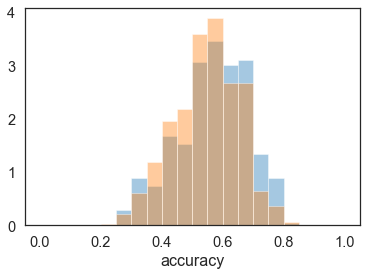

In [4]:
from laverna.task import ReversalTask, simulate_reversal_task
np.random.seed(47404)

def inv_logit(arr):
    return 1. / (1 + np.exp(-arr))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define metadata.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Agent parameters.
n_agents = 1000
beta = np.repeat(10.0, n_agents)
eta  = np.repeat(0.5, n_agents)
xi   = inv_logit( 2.5 * (np.random.normal(0,1,n_agents) - 1) )

## Task parameters.
n_trials = 15
n_blocks = 6
blocks = np.repeat(15,6)

p_target = 0.8
p_other  = 0.2

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Simulate behavior.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulate rewards.
R, pi = simulate_reversal_task(blocks, p_target=p_target, p_other=p_other, size=n_agents)

## Initialize agents.
reversal = ReversalTask(beta, eta, xi)

## Simulate choice.
Y = reversal.train(R, q0=0.33).reshape(-1, n_blocks, n_trials)

## Evaluate accuracy.
accuracy = np.zeros((n_agents, n_blocks))
for i in range(n_blocks):
    accuracy[:,i] = (Y[:,i] == pi[:,i,np.newaxis]).sum(axis=1)
accuracy = accuracy.sum(axis=1) / blocks.sum()

sns.distplot(gb.accuracy, kde=False, bins=np.linspace(0,1,21), norm_hist=True)
sns.distplot(accuracy, kde=False, bins=np.linspace(0,1,21), norm_hist=True)

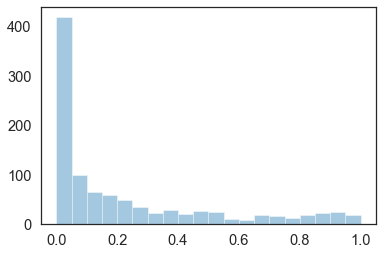

In [5]:


x = np.random.normal(0,1,1000)

sns.distplot(inv_logit(2.5*(x - 1)), kde=False, bins=np.linspace(0,1,21))

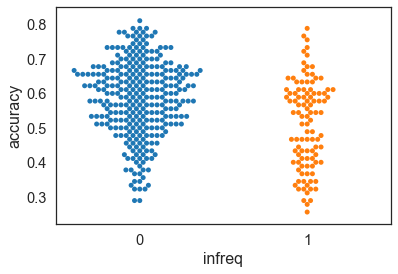

In [6]:
sns.swarmplot('infreq','accuracy',data=gb)

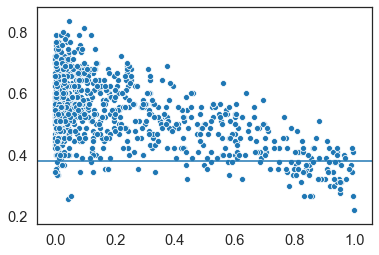

In [7]:
ax = sns.scatterplot(xi,accuracy)
ax.axhline(0.38)

In [ ]:
0.5 * 0.25